In [ ]:
# 量子ビットを理解する（番外編）

In [ ]:
!pip install -U pip
!pip install numpy matplotlib ipython 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches

## 初期状態の設定

In [2]:
#量子bit×3の生成
import dataclasses
@dataclasses.dataclass
class Qbit:
    phi: float # ブロッホ球での|0>からの角度
    shift: float # 位相差

#量子bit0
Q1 = Qbit(math.pi*0.5,math.pi*0)
#量子bit1
Q2 = Qbit(math.pi*0.5,math.pi*0)
#量子bit2
Q3 = Qbit(math.pi*0,math.pi*0)

## 諸元算出

In [3]:
def createYo():
    yo = np.arange(0,2,0.001)*math.pi
    return yo

def createBy3bit(q_1:Qbit,q_2:Qbit,q_3:Qbit):
    # 初期の各量子bit列の波の軸
    yo  = createYo()
    q000 = (math.cos(q_1.phi/2) * math.cos(q_2.phi/2) * math.cos(q_3.phi/2))*np.sin(yo)
    q001 = (math.cos(q_1.phi/2) * math.cos(q_2.phi/2) * math.sin(q_3.phi/2))*np.sin(yo-(q_3.shift))
    q010 = (math.cos(q_1.phi/2) * math.sin(q_2.phi/2) * math.cos(q_3.phi/2))*np.sin(yo-(q_2.shift))
    q011 = (math.cos(q_1.phi/2) * math.sin(q_2.phi/2) * math.sin(q_3.phi/2))*np.sin(yo-(q_2.shift+q_3.shift))
    q100 = (math.sin(q_1.phi/2) * math.cos(q_2.phi/2) * math.cos(q_3.phi/2))*np.sin(yo-(q_1.shift))
    q101 = (math.sin(q_1.phi/2) * math.cos(q_2.phi/2) * math.sin(q_3.phi/2))*np.sin(yo-(q_1.shift+q_3.shift))
    q110 = (math.sin(q_1.phi/2) * math.sin(q_2.phi/2) * math.cos(q_3.phi/2))*np.sin(yo-(q_1.shift+q_2.shift))
    q111 = (math.sin(q_1.phi/2) * math.sin(q_2.phi/2) * math.sin(q_3.phi/2))*np.sin(yo-(q_1.shift+q_2.shift+q_3.shift))
    return q000,q001,q010,q011,q100,q101,q110,q111

## 描画用関数

In [4]:
# 波描画
def set_wave_ax(ax,q,title):
    yo = createYo()
    ax.plot(yo,q)
    ax.set_xticks([0, math.pi*0.5 ,math.pi, math.pi*1.5 ,math.pi*2], ["0", "1/2π", "π","3/2π","2π"])
    ax.set_ylim(-1.1,1.1)
    ax.set_xlim(0,math.pi*2)
    ax.set_title(title)
    return ax
    
def draw_8waves(q000,q001,q010,q011,q100,q101,q110,q111):
    fig = plt.figure(figsize=(16,16)) #図のサイズを決定
    ax_000 = fig.add_subplot(4,2,1)
    ax_001 = fig.add_subplot(4,2,2)
    ax_010 = fig.add_subplot(4,2,3)
    ax_011 = fig.add_subplot(4,2,4)
    ax_100 = fig.add_subplot(4,2,5)
    ax_101 = fig.add_subplot(4,2,6)
    ax_110 = fig.add_subplot(4,2,7)
    ax_111 = fig.add_subplot(4,2,8)

    ax_000 = set_wave_ax(ax_000,q000,"|000>")
    ax_001 = set_wave_ax(ax_001,q001,"|001>")
    ax_010 = set_wave_ax(ax_010,q010,"|010>")
    ax_011 = set_wave_ax(ax_011,q011,"|011>")
    ax_100 = set_wave_ax(ax_100,q100,"|100>")
    ax_101 = set_wave_ax(ax_101,q101,"|101>")
    ax_110 = set_wave_ax(ax_110,q110,"|110>")
    ax_111 = set_wave_ax(ax_111,q111,"|111>")

    plt.subplots_adjust(hspace=0.8)

    plt.show()

    return

In [5]:
# 振幅描画
def draw_8amp(q000,q001,q010,q011,q100,q101,q110,q111):

    from matplotlib import rcParams
    plt.rcParams["font.family"] = "MS Gothic"

    fig = plt.figure()
    ax = fig.subplots()

    # データの準備
    categories = ['|000>', '|001>', '|010>','|011>','|100>', '|101>', '|110>','|111>']
    values = [max(q000)**2, max(q001)**2, max(q010)**2, max(q011)**2,max(q100)**2, max(q101)**2, max(q110)**2, max(q111)**2]

    # 棒グラフの作成
    ax.bar(categories, values)

    # タイトルとラベルの追加
    ax.set_title('振幅')
    ax.set_ylim(0,1.1)

    # グラフの表示
    plt.show()

    return

In [6]:
# 位相描画
def set_phase_ax(ax,q,title):
    shape = patches.Circle(xy=(0,0), radius=1, facecolor="white", edgecolor="black", linewidth=1)

    s = phase_pi(q)

    ax.add_patch(shape)
    ax.plot([0,np.sin(s)],[0,np.cos(s)],color='gray')
    ax.set_xlim(-1.1,1.1)
    ax.set_ylim(-1.1,1.1)
    ax.set_title(title)
    ax.set_aspect('equal')
    ax.axis('off')
    if max(q) > 0.0001:
        ax.text(-0.28,-1.35,str(round(s/math.pi,2)),color='black',fontsize=16)
    else:
        ax.text(-0.28,-1.35,"---",color='black',fontsize=16)
    return
    
def draw_8phase(q000,q001,q010,q011,q100,q101,q110,q111):

    fig = plt.figure(figsize=(16,3)) #図のサイズを決定
    ax_000 = fig.add_subplot(1,8,1)
    ax_001 = fig.add_subplot(1,8,2)
    ax_010 = fig.add_subplot(1,8,3)
    ax_011 = fig.add_subplot(1,8,4)
    ax_100 = fig.add_subplot(1,8,5)
    ax_101 = fig.add_subplot(1,8,6)
    ax_110 = fig.add_subplot(1,8,7)
    ax_111 = fig.add_subplot(1,8,8)
    fig = plt.figure()

    ax_000 = set_phase_ax(ax_000,q000,"|000>")
    ax_001 = set_phase_ax(ax_001,q001,"|001>")
    ax_010 = set_phase_ax(ax_010,q010,"|010>")
    ax_011 = set_phase_ax(ax_011,q011,"|011>")
    ax_100 = set_phase_ax(ax_100,q100,"|100>")
    ax_101 = set_phase_ax(ax_101,q101,"|101>")
    ax_110 = set_phase_ax(ax_110,q110,"|110>")
    ax_111 = set_phase_ax(ax_111,q111,"|111>")

    plt.show()

    return

# 以下 関数の定義

# 単量子ゲート

### アダマールゲート
$$
H =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

In [7]:
#アダマール変換 
# やっていること：|1>を反転させ、反時計周りに1/4π回転させる
def h_gate(x,z):
    x_ = ( x + z)/2**0.5
    z_ = ( x - z)/2**0.5
    return x_,z_

### Tゲート
$$
T =
\begin{pmatrix}
1 & 0 \\
0 & exp(\frac{i\pi}{4})
\end{pmatrix}
$$

In [8]:
#Tゲート変換 
# やっていること：|1>の位相を1/4π（45°）進める
def t_gate(x,z):
    x_ = x
    z_ = np.roll(z,len(z)//8)
    return x_,z_

### Sゲート
$$
S =
\begin{pmatrix}
1 & 0 \\
0 & exp(\frac{i\pi}{2})
\end{pmatrix}
$$

In [9]:
#Sゲート変換 
# やっていること：|1>の位相を1/2π（90°）進める
def s_gate(x,z):
    x_ = x
    z_ = np.roll(z,len(z)//4)
    return x_,z_

### Xゲート
$$
X =
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$$

In [10]:
#Xゲート変換 
# やっていること：|0>←→|1>を交換する
def x_gate(x,z):
    x_ = z
    z_ = x
    return x_,z_

### Yゲート
$$
Y =
\begin{pmatrix}
0 & exp(\frac{-i\pi}{2}) \\
exp(\frac{i\pi}{2})  & 0
\end{pmatrix}
$$

In [11]:
#Yゲート変換 
# やっていること：|0>→i|1>、|1>→-i|0>
def y_gate(x,z):
    x_ = np.roll(z,(len(z)+1)//4)
    z_ = np.roll(x,-(len(x)+1)//4)
    return x_,z_

### Zゲート
$$
Z =
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$

In [12]:
#Zゲート変換 
# やっていること：|1>の符号を反転させる
def z_gate(x,z):
    x_ = x
    z_ = -z
    return x_,z_

## 位相判定

In [13]:
def phase(x):
    i = 0
    if max(x) < 0.00001:
        return 0
    for i in range(len(x)+1):
        if x[i%len(x)] <= 0.00001:#本来は0.0とすべきであるが、誤差を考慮し微小値を基準とした
            if x[(i+1)%len(x)] > 0.0:
                break
    return i%len(x)

In [14]:
def phase_pi(x):
    return phase(x)/len(x)*2*math.pi

### グローバル位相のキャンセル

In [15]:
def global_phase8(x000,x001,x010,x011,x100,x101,x110,x111):
    if max(x000) >= 0.00001:
        x = x000
    elif max(x001) >= 0.00001:
        x = x001
    elif max(x010) >= 0.00001:
        x = x010
    elif max(x011) >= 0.00001:
        x = x011
    elif max(x100) >= 0.00001:
        x = x100
    elif max(x101) >= 0.00001:
        x = x101
    elif max(x110) >= 0.00001:
        x = x110
    else:
        x = x111
    return phase(x)
    
def cancel_global_shift8(x000,x001,x010,x011,x100,x101,x110,x111):
    p = global_phase8(x000,x001,x010,x011,x100,x101,x110,x111)
    x000_ = np.roll(x000,-p)
    x001_ = np.roll(x001,-p)
    x010_ = np.roll(x010,-p)
    x011_ = np.roll(x011,-p)
    x100_ = np.roll(x100,-p)
    x101_ = np.roll(x101,-p)
    x110_ = np.roll(x110,-p)
    x111_ = np.roll(x111,-p)
    return x000_,x001_,x010_,x011_,x100_,x101_,x110_,x111_

# Let's Try

## 量子位相キックバック

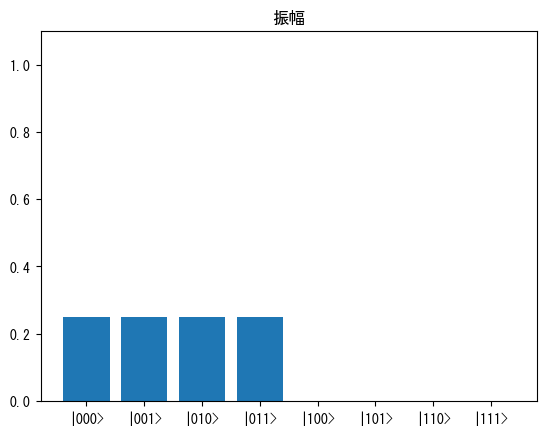

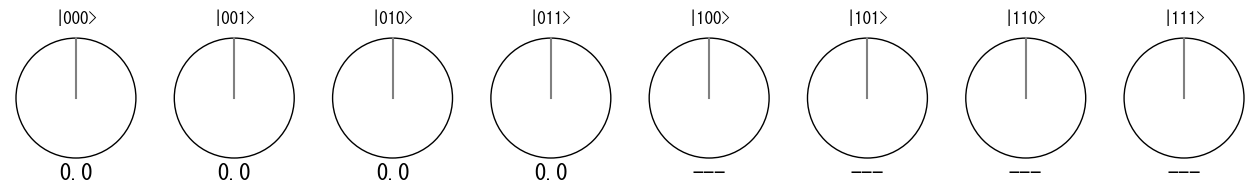

<Figure size 640x480 with 0 Axes>

In [24]:
#初期状態の設定
q000,q001,q010,q011,q100,q101,q110,q111 = createBy3bit(Q3,Q2,Q1)
#draw_8waves(q000,q001,q010,q011,q100,q101,q110,q111)
draw_8amp(q000,q001,q010,q011,q100,q101,q110,q111)
draw_8phase(q000,q001,q010,q011,q100,q101,q110,q111)

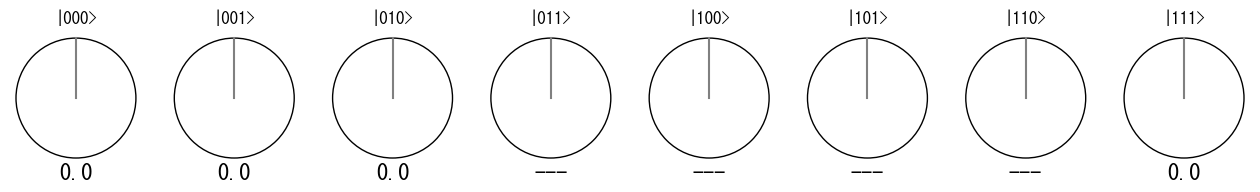

<Figure size 640x480 with 0 Axes>

In [25]:
#ccx
q011,q111 = x_gate(q011,q111)
draw_8phase(q000,q001,q010,q011,q100,q101,q110,q111)

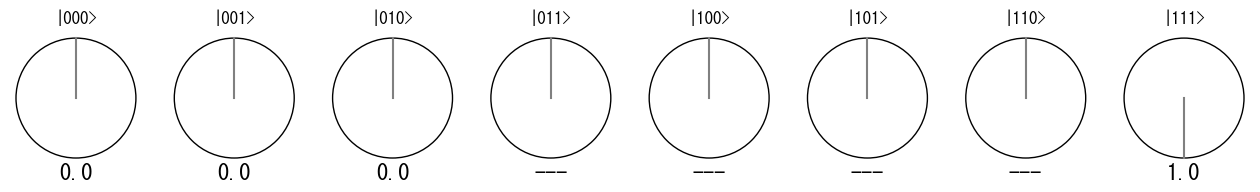

<Figure size 640x480 with 0 Axes>

In [26]:
#Q3をz反転
q000,q100 = z_gate(q000,q100)
q001,q101 = z_gate(q001,q101)
q010,q110 = z_gate(q010,q110)
q011,q111 = z_gate(q011,q111)
draw_8phase(q000,q001,q010,q011,q100,q101,q110,q111)

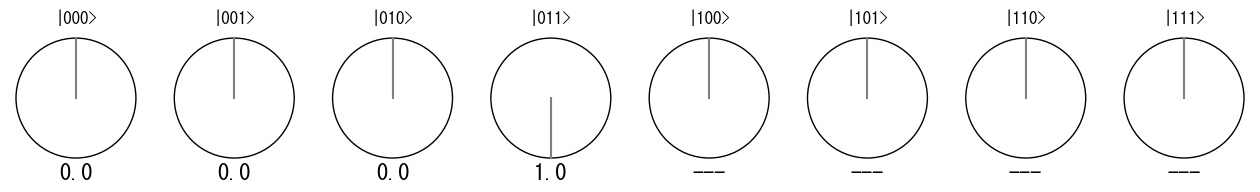

<Figure size 640x480 with 0 Axes>

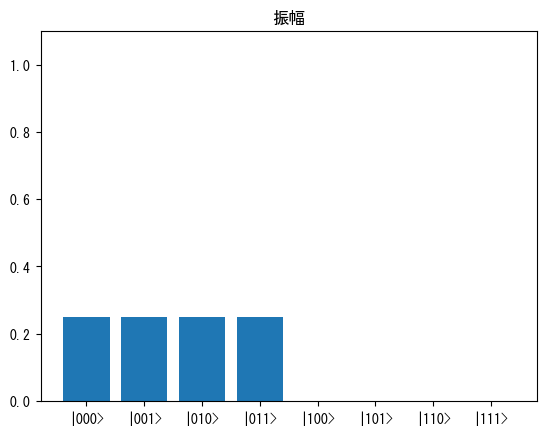

In [27]:
#ccx
q011,q111 = x_gate(q011,q111)
draw_8phase(q000,q001,q010,q011,q100,q101,q110,q111)
draw_8amp(q000,q001,q010,q011,q100,q101,q110,q111)

In [50]:
import numpy as np
import math
import matplotlib.patches as patches
def vector_to_vector_rotation_angle(v1, v2): #２ベクトルの角度をπ単位で算出
    return  np.arccos(np.inner(v1,v2)/(np.dot(np.linalg.norm(v1),np.linalg.norm(v2))))

dims = 2**2 # 2量子ビットのため次元数は2^2となる
x = (1/dims**0.5)
one = np.ones((dims,1))
sKet = x*one             # |s>を求める
sBra = np.transpose(sKet)# <s|を求める

HxH = np.array([[ 1, 1, 1, 1],
                [ 1,-1, 1,-1],
                [ 1, 1,-1,-1],
                [ 1,-1,-1, 1]])/2
XxX = np.array([[ 0, 0, 0, 1],
                [ 0, 0, 1, 0],
                [ 0, 1, 0, 0],
                [ 1, 0, 0, 0]])
CZ  = np.array([[ 1, 0, 0, 0],
                [ 0, 1, 0, 0],
                [ 0, 0, 1, 0],
                [ 0, 0, 0,-1]])
CX  = np.array([[ 1, 0, 0, 0],
                [ 0, 1, 0, 0],
                [ 0, 0, 0, 1],
                [ 0, 0, 1, 0]])
IH  = np.array([[ 1, 1, 0, 0],
                [ 1,-1, 0, 0],
                [ 0, 0, 1, 1],
                [ 0, 0, 1,-1]])/2**0.5

q00 = np.array([[1],[0],[0],[0]]) # Try any Vector

print('1回目のアダマール後')
G_1 = np.dot(HxH,q00)
print(G_1)

print('1回目のXゲート後')
G_2 = np.dot(XxX,G_1)
print(G_2)

print('CX前のHゲート後')
G_20 = np.dot(IH,G_2)
print(G_20)

print('CXゲート後')
G_3 = np.dot(CX,G_20)
print(G_3)

print('CX後のHゲート後')
G_30 = np.dot(IH,G_3)
print(G_30)

print('2回目のXゲート後')
G_4 = np.dot(XxX,G_30)
print(G_4)

print('2回目のHゲート後')
t00 = np.dot(HxH,G_4)
print('変換後のベクトル')
print(t00)

print('変換前と変換後（に原点で反転させた）のベクトルの間の角度は',round(vector_to_vector_rotation_angle( q00.reshape(-1),-t00.reshape(-1))/np.pi,3),'pi')
print('変換前のベクトルと|s>との間の角度は',                     round(vector_to_vector_rotation_angle( q00.reshape(-1),sKet.reshape(-1))/np.pi,3),'pi')
print('変換後（に原点で反転させた）ベクトルと|s>との間の角度は',   round(vector_to_vector_rotation_angle(sKet.reshape(-1),-t00.reshape(-1))/np.pi,3),'pi')

1回目のアダマール後
[[0.5]
 [0.5]
 [0.5]
 [0.5]]
1回目のXゲート後
[[0.5]
 [0.5]
 [0.5]
 [0.5]]
CX前のHゲート後
[[0.70710678]
 [0.        ]
 [0.70710678]
 [0.        ]]
CXゲート後
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]
CX後のHゲート後
[[ 0.5]
 [ 0.5]
 [ 0.5]
 [-0.5]]
2回目のXゲート後
[[-0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]]
2回目のHゲート後
変換後のベクトル
[[ 0.5]
 [-0.5]
 [-0.5]
 [-0.5]]
変換前と変換後（に原点で反転させた）のベクトルの間の角度は 0.667 pi
変換前のベクトルと|s>との間の角度は 0.333 pi
変換後（に原点で反転させた）ベクトルと|s>との間の角度は 0.333 pi


In [46]:
import numpy as np
import math
import matplotlib.patches as patches
def vector_to_vector_rotation_angle(v1, v2): #２ベクトル間の角度をπ単位で算出
    return  np.arccos(np.inner(v1,v2)/(np.dot(np.linalg.norm(v1),np.linalg.norm(v2))))

dims = 2**3 # 3量子ビットのため次元数は2^3となる
x = (1/dims**0.5)
one = np.ones((dims,1))
sKet = x*one             # |s>を求める
sBra = np.transpose(sKet)# <s|を求める

HxHxH =np.array([[ 1, 1, 1, 1, 1, 1, 1, 1],
                 [ 1,-1, 1,-1, 1,-1, 1,-1],
                 [ 1, 1,-1,-1, 1, 1,-1,-1],
                 [ 1,-1,-1, 1, 1,-1,-1, 1],
                 [ 1, 1, 1, 1,-1,-1,-1,-1], 
                 [ 1,-1, 1,-1,-1, 1,-1, 1], 
                 [ 1, 1,-1,-1,-1,-1, 1, 1],
                 [ 1,-1,-1, 1,-1, 1, 1,-1]
                ])/2**1.5
XxXxX =np.array([[ 0, 0, 0, 0, 0, 0, 0, 1],
                 [ 0, 0, 0, 0, 0, 0, 1, 0],
                 [ 0, 0, 0, 0, 0, 1, 0, 0],
                 [ 0, 0, 0, 0, 1, 0, 0, 0],
                 [ 0, 0, 0, 1, 0, 0, 0, 0],
                 [ 0, 0, 1, 0, 0, 0, 0, 0],
                 [ 0, 1, 0, 0, 0, 0, 0, 0],
                 [ 1, 0, 0, 0, 0, 0, 0, 0]
                ])
CCX  = np.array([[ 1, 0, 0, 0, 0, 0, 0, 0],
                 [ 0, 1, 0, 0, 0, 0, 0, 0],
                 [ 0, 0, 1, 0, 0, 0, 0, 0],
                 [ 0, 0, 0, 1, 0, 0, 0, 0],
                 [ 0, 0, 0, 0, 1, 0, 0, 0],
                 [ 0, 0, 0, 0, 0, 1, 0, 0],
                 [ 0, 0, 0, 0, 0, 0, 0, 1],
                 [ 0, 0, 0, 0, 0, 0, 1, 0]
                ])
IIH  = np.array([[ 1, 1, 0, 0, 0, 0, 0, 0],
                 [ 1,-1, 0, 0, 0, 0, 0, 0],
                 [ 0, 0, 1, 1, 0, 0, 0, 0],
                 [ 0, 0, 1,-1, 0, 0, 0, 0],
                 [ 0, 0, 0, 0, 1, 1, 0, 0],
                 [ 0, 0, 0, 0, 1,-1, 0, 0],
                 [ 0, 0, 0, 0, 0, 0, 1, 1],
                 [ 0, 0, 0, 0, 0, 0, 1,-1]
                ])/2**0.5

q000 = np.array([[1],[0],[0],[0],[0],[0],[0],[0]]) # Try any Vector

print('1回目のアダマール後')
G_1 = np.dot(HxHxH,q000)
print(G_1)

print('1回目のXゲート後')
G_2 = np.dot(XxXxX,G_1)
print(G_2)

print('CCX前のHゲート後')
G_20 = np.dot(IIH,G_2)
print(G_20)

print('CCXゲート後')
G_3 = np.dot(CCX,G_20)
print(G_3)

print('CCX後のHゲート後')
G_30 = np.dot(IIH,G_3)
print(G_30)

print('2回目のXゲート後')
G_4 = np.dot(XxXxX,G_30)

print(G_4)
print('2回目のHゲート後')
t000 = np.dot(HxHxH,G_4)
print('変換後のベクトル')
print(t00)

print('変換前と変換後（に原点で反転させた）ベクトルの間の角度は',round(vector_to_vector_rotation_angle(q000.reshape(-1),-t000.reshape(-1))/np.pi,3),'pi')
print('変換前のベクトルと|s>との間の角度は',                   round(vector_to_vector_rotation_angle(q000.reshape(-1), sKet.reshape(-1))/np.pi,3),'pi')
print('変換後（に原点で反転させた）ベクトルと|s>との間の角度は', round(vector_to_vector_rotation_angle(sKet.reshape(-1),-t000.reshape(-1))/np.pi,3),'pi')

1回目のアダマール後
[[0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]]
1回目のXゲート後
[[0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]]
1回目のHゲート後
[[0.5]
 [0. ]
 [0.5]
 [0. ]
 [0.5]
 [0. ]
 [0.5]
 [0. ]]
CXゲート後
[[0.5]
 [0. ]
 [0.5]
 [0. ]
 [0.5]
 [0. ]
 [0. ]
 [0.5]]
2回目のHゲート後
[[ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [-0.35355339]]
2回目のXゲート後
[[-0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]]
2回目のHゲート後
変換後のベクトル
[[ 0.75]
 [-0.25]
 [-0.25]
 [-0.25]
 [-0.25]
 [-0.25]
 [-0.25]
 [-0.25]]
変換前と変換後に点対称にしたベクトルの間の角度は 0.77 pi
変換前のベクトルと|s>との間の角度は 0.385 pi
変換後に点対称にしたベクトルと|s>との間の角度は 0.385 pi


In [48]:
import numpy as np
import math
import matplotlib.patches as patches
def vector_to_vector_rotation_angle(v1, v2): #２ベクトル間の角度をπ単位で算出
    return  np.arccos(np.inner(v1,v2)/(np.dot(np.linalg.norm(v1),np.linalg.norm(v2))))

dims = 2**3 # 3量子ビットのため次元数は2^3となる
x = (1/dims**0.5)
one = np.ones((dims,1))
sKet = x*one             # |s>を求める
sBra = np.transpose(sKet)# <s|を求める

HxHxH =np.array([[ 1, 1, 1, 1, 1, 1, 1, 1],
                 [ 1,-1, 1,-1, 1,-1, 1,-1],
                 [ 1, 1,-1,-1, 1, 1,-1,-1],
                 [ 1,-1,-1, 1, 1,-1,-1, 1],
                 [ 1, 1, 1, 1,-1,-1,-1,-1], 
                 [ 1,-1, 1,-1,-1, 1,-1, 1], 
                 [ 1, 1,-1,-1,-1,-1, 1, 1],
                 [ 1,-1,-1, 1,-1, 1, 1,-1]
                ])/2**1.5
XxXxX =np.array([[ 0, 0, 0, 0, 0, 0, 0, 1],
                 [ 0, 0, 0, 0, 0, 0, 1, 0],
                 [ 0, 0, 0, 0, 0, 1, 0, 0],
                 [ 0, 0, 0, 0, 1, 0, 0, 0],
                 [ 0, 0, 0, 1, 0, 0, 0, 0],
                 [ 0, 0, 1, 0, 0, 0, 0, 0],
                 [ 0, 1, 0, 0, 0, 0, 0, 0],
                 [ 1, 0, 0, 0, 0, 0, 0, 0]
                ])
CCZ  = np.array([[ 1, 0, 0, 0, 0, 0, 0, 0],
                 [ 0, 1, 0, 0, 0, 0, 0, 0],
                 [ 0, 0, 1, 0, 0, 0, 0, 0],
                 [ 0, 0, 0, 1, 0, 0, 0, 0],
                 [ 0, 0, 0, 0, 1, 0, 0, 0],
                 [ 0, 0, 0, 0, 0, 1, 0, 0],
                 [ 0, 0, 0, 0, 0, 0, 1, 0],
                 [ 0, 0, 0, 0, 0, 0, 0,-1]
                ])

q000 = np.array([[1],[0],[0],[0],[0],[0],[0],[0]]) # Try any Vector

print('1回目のアダマール後')
G_1 = np.dot(HxHxH,q000)
print(G_1)

print('1回目のXゲート後')
G_2 = np.dot(XxXxX,G_1)
print(G_2)

print('CCXゲート後')
G_3 = np.dot(CCZ,G_2)
print(G_3)

print('2回目のXゲート後')
G_4 = np.dot(XxXxX,G_30)
print(G_4)

print('2回目のHゲート後')
t000 = np.dot(HxHxH,G_4)
print('変換後のベクトル')
print(t00)

print('変換前と変換後（に原点で反転させた）ベクトルの間の角度は',round(vector_to_vector_rotation_angle(q000.reshape(-1),-t000.reshape(-1))/np.pi,3),'pi')
print('変換前のベクトルと|s>との間の角度は',                   round(vector_to_vector_rotation_angle(q000.reshape(-1), sKet.reshape(-1))/np.pi,3),'pi')
print('変換後（に原点で反転させた）ベクトルと|s>との間の角度は', round(vector_to_vector_rotation_angle(sKet.reshape(-1),-t000.reshape(-1))/np.pi,3),'pi')

1回目のアダマール後
[[0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]]
1回目のXゲート後
[[0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]]
CCXゲート後
[[ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [-0.35355339]]
2回目のXゲート後
[[-0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]]
2回目のHゲート後
変換後のベクトル
[[ 0.75]
 [-0.25]
 [-0.25]
 [-0.25]
 [-0.25]
 [-0.25]
 [-0.25]
 [-0.25]]
変換前と変換後（に原点で反転させた）ベクトルの間の角度は 0.77 pi
変換前のベクトルと|s>との間の角度は 0.385 pi
変換後（に原点で反転させた）ベクトルと|s>との間の角度は 0.385 pi
